In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.8 MB/s eta 0:00:00


In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import math

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # Added RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
from tensorflow.keras.callbacks import EarlyStopping
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
from sklearn.neural_network import MLPRegressor


In [3]:
from google.colab import files
uploaded = files.upload()

Saving DhakaDailyP.csv to DhakaDailyP.csv


In [4]:
df = pd.read_csv("DhakaDailyP.csv")

# Data Prep

In [5]:
X = df.drop(columns=['TempMean', 'zone']).values  # Convert to NumPy array
y = df['TempMean'].values  # Convert to NumPy array

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [6]:
df.tail()

,Date,TempMax,TempMin,TempMean,RelHumMax,RelHumMin,RelHumMean,WindGustMax,WindGustMin,WindGustMean,WindSpeedMax,WindSpeedMin,WindSpeedMean,SunShDurMin,ShWaveRad,UVRad,Evapotranspiration,zone
3692,3693,27.870424,14.410426,19.789177,93.989080,36.841496,74.684410,5.3,2.9,4.004167,2.700000,1.456022,2.053184,668.63340,5411,578.44000,2.818080,1
3693,3694,28.230425,13.930426,20.120424,95.306335,32.459953,71.647310,5.3,1.6,3.450000,2.801785,1.000000,2.003868,623.37006,5389,585.98000,2.894400,2
3694,3695,28.470425,14.100426,21.511260,98.356926,33.007755,67.256160,5.1,1.2,3.220834,2.473863,0.583095,1.757366,546.60020,5310,582.47003,2.975040,2
3695,3696,28.570425,16.110424,21.699175,96.244020,39.720676,74.035576,4.6,2.0,3.229166,2.102380,0.943398,1.531127,497.14750,4800,552.63000,2.610720,2
3696,3697,29.150425,17.980425,22.623758,94.680920,47.536633,74.969450,6.6,2.6,4.454167,2.236068,1.204160,1.734011,566.51720,5096,564.79004,2.761921,2


# Multi-layer perceptron regressor kfold

In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Creating and training the MLPRegressor model
    model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
    model.fit(X_train, y_train)

    # Predicting the average temperature
    y_pred = model.predict(X_test)

# Evaluating the model
f_model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
f_model.fit(X, y)
# Predicting the average temperature
y_predf = f_model.predict(X)

# Evaluate the model # Explained variance score: 1 is perfect prediction
print('Multiple Linear Regression Model Results:')
print('Model Accuracy      = ' + str(f_model.score(X_train, y_train)))
print('Mean absolute error = ' + str(mean_absolute_error(y, y_predf)))
print('Mean squared error  = ' + str(mean_squared_error(y, y_predf)))
print('Root mean square error = ' + str(math.sqrt(mean_squared_error(y, y_predf))))
print('R2 score            = ' + str(r2_score(y, y_predf)))
print('Variance score train= ' + str(model.score(X_train, y_train)))
print('Variance score test = ' + str(model.score(X, y)))
print("CossVal             = " + str(np.mean(cross_val_score(f_model, X, y, cv=10, scoring='r2'))))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multiple Linear Regression Model Results:
Model Accuracy      = 0.9962685443907661
Mean absolute error = 0.20964764285289036
Mean squared error  = 0.0738211067005688
Root mean square error = 0.2717003987861792
R2 score            = 0.9962576718343356
Variance score train= 0.9964169914369401
Variance score test = 0.9959617752559857


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

CossVal             = 0.9942278633880008


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


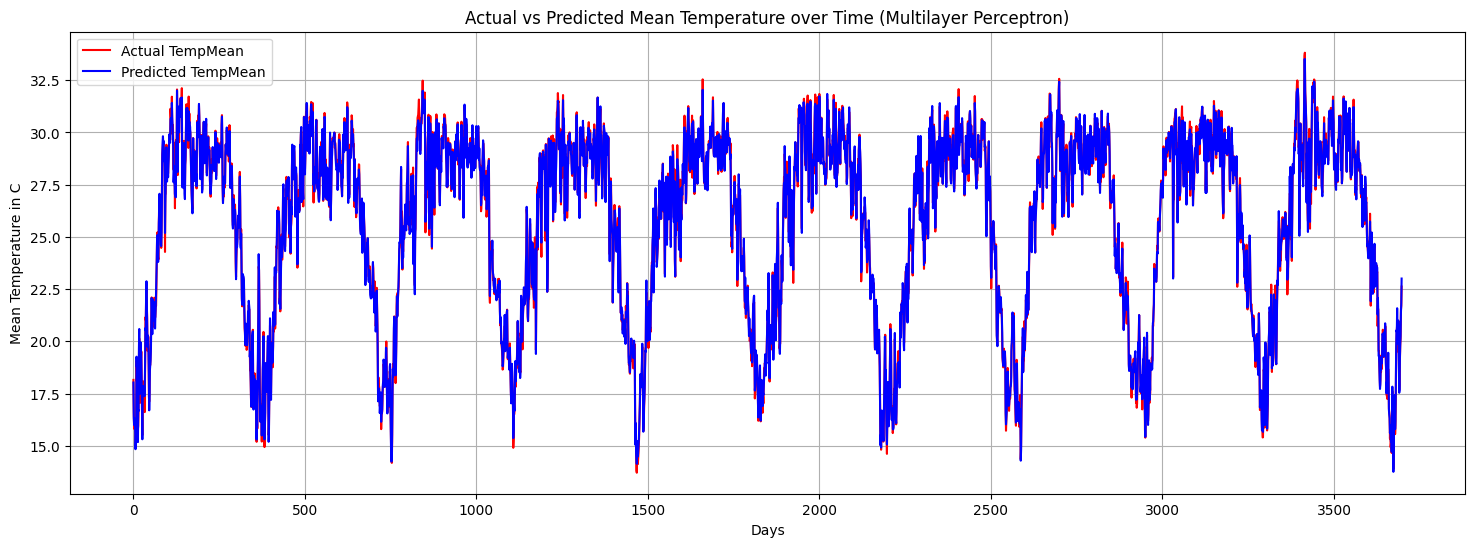

In [ ]:
# Plot actual vs predicted values for the test set
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], y, label='Actual TempMean', color='red')
plt.plot(df['Date'], y_predf, label='Predicted TempMean', color='blue')
plt.xlabel('Days')
plt.ylabel('Mean Temperature in C')
plt.title('Actual vs Predicted Mean Temperature over Time (Multilayer Perceptron)')
plt.legend()
plt.grid(True)
plt.show()

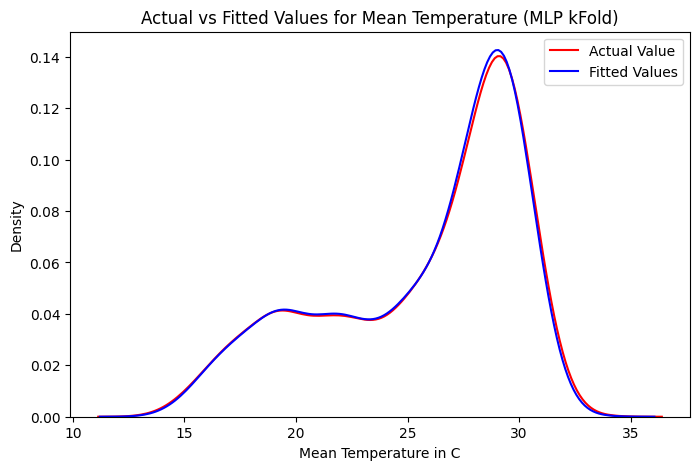

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))

ax1 = sns.kdeplot(df['TempMean'], color="r", label="Actual Value")
sns.kdeplot(y_predf, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Mean Temperature (MLP kFold)')
plt.xlabel('Mean Temperature in C')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

In [ ]:
# The original features were: TempMax, TempMin, RelHumMax, RelHumMin, RelHumMean, WindGustMax, WindGustMin, WindMean, PressMax, PressMin, PressMean, SunShDur, SunShDurMin, ShWaveRad, UVRad, Evapotranspiration
# We excluded 'TempMean', 'zone', and 'Date' from the features used for training, which leaves 15 features.
future_features = np.array([[3698, 32.74043, 27.28042, 93.94258, 70.56336, 83.55624, 8.2, 5.2, 6.645834, 4.134006, 2.973214, 3.419515, 433.5394, 3812, 464.1, 3.51648]]) # Example values (15 features)

imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
scaler = StandardScaler()
# Reshape the future_features to be a 2D array with a single sample
future_features = imputer.fit_transform(future_features)
future_features = scaler.fit_transform(future_features)

# Use the trained Decision Tree Regressor model to predict the TempMean for the future date
predicted_tempmean_future = f_model.predict(future_features)

print(f'Predicted TempMean for the future date: {predicted_tempmean_future[0]:.2f} C')

Predicted TempMean for the future date: 25.34 C


# Backpropagation

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),  # Introduce dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Assuming it's a regression task, so 1 output neuron
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping and tqdm progress bar
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set the number of epochs
epochs = 100

# Initialize tqdm progress bar
epoch_bar = tqdm(total=epochs, desc='Epochs', unit='epoch', position=0)

# Train the model
for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the test set
    mse = model.evaluate(X_test, y_test, verbose=0)

    # Update the tqdm progress bar
    epoch_bar.set_postfix_str(f'Epoch {epoch + 1}/{epochs} - loss: {history.history["loss"][0]:.4f} - val_loss: {history.history["val_loss"][0]:.4f} - Test MSE: {mse:.4f}')
    epoch_bar.update(1)

# Close the tqdm progress bar
epoch_bar.close()

predictions = model.predict(X_test)

# Store results in a list
results = []
for i in range(10):
    actual_value = y_test[i]
    predicted_value = predictions[i][0]
    results.append([f'Sample {i + 1}', f'{actual_value:.2f}', f'{predicted_value:.2f}'])

# Create a table
table = tabulate(results, headers=['Sample', 'Actual', 'Predicted'], tablefmt='pretty')

# Print the table
print(table)

# Evaluate the final MSE on the entire test set
print(f'backpropagation Test MSE: {mse}')
print('Mean absolute error = ' + str(mean_absolute_error(y_test, predictions)))
print('Mean squared error  = ' + str(mean_squared_error(y_test, predictions)))
print('Root mean square error = ' + str(math.sqrt(mean_squared_error(y_test, predictions))))
print('R2 score            = ' + str(r2_score(y_test, predictions)))
print('Variance score train= ' + str(r2_score(y_train, model.predict(X_train))))
print('Variance score test = ' + str(r2_score(y_test, predictions)))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Epochs: 100%|██████████| 100/100 [00:52<00:00,  1.90epoch/s, Epoch 100/100 - loss: 0.2526 - val_loss: 0.2018 - Test MSE: 0.1715]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


+-----------+--------+-----------+
|  Sample   | Actual | Predicted |
+-----------+--------+-----------+
| Sample 1  | 16.62  |   16.30   |
| Sample 2  | 16.07  |   16.67   |
| Sample 3  | 18.72  |   19.21   |
| Sample 4  | 19.19  |   19.54   |
| Sample 5  | 17.05  |   17.49   |
| Sample 6  | 19.63  |   20.00   |
| Sample 7  | 18.92  |   18.84   |
| Sample 8  | 21.15  |   20.88   |
| Sample 9  | 21.01  |   20.84   |
| Sample 10 | 22.57  |   22.91   |
+-----------+--------+-----------+
backpropagation Test MSE: 0.17153549194335938
Mean absolute error = 0.34014294602567796
Mean squared error  = 0.1715354918346389
Root mean square error = 0.4141684341359671
R2 score            = 0.991005191322855
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Variance score train= 0.9919941506009794
Variance score test = 0.991005191322855


116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


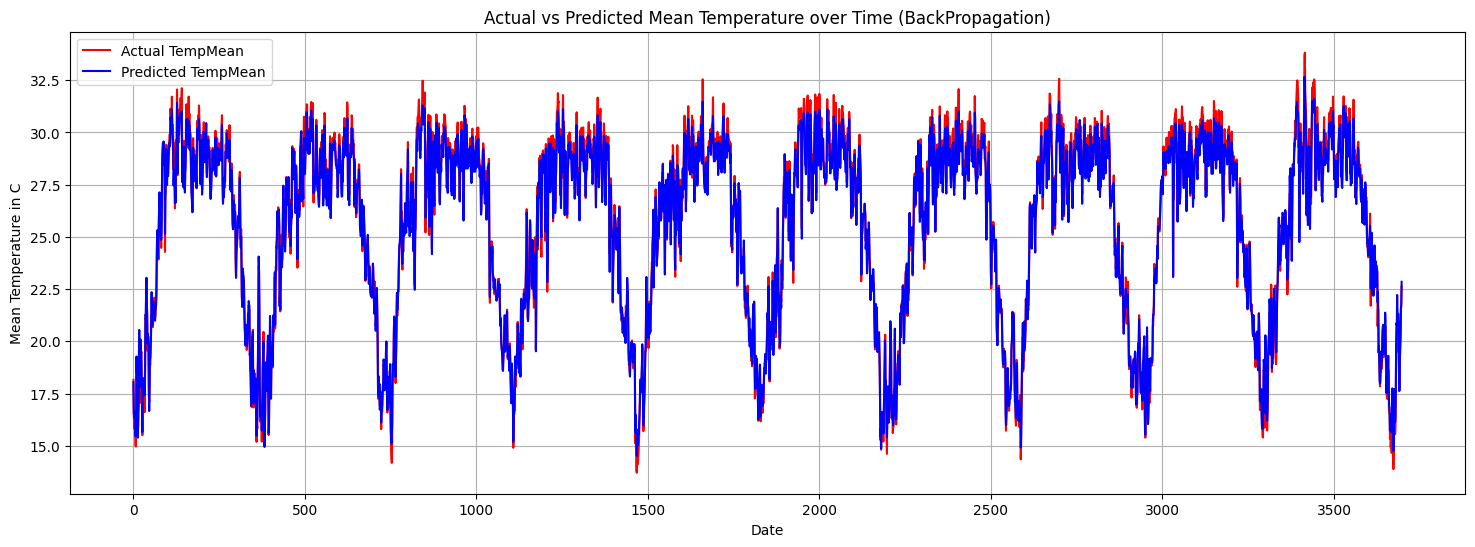

In [ ]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], y, label='Actual TempMean', color='red')
plt.plot(df['Date'], model.predict(X), label='Predicted TempMean', color='blue')
plt.xlabel('Date')
plt.ylabel('Mean Temperature in C')
plt.title('Actual vs Predicted Mean Temperature over Time (BackPropagation)')
plt.legend()
plt.grid(True)
plt.show()

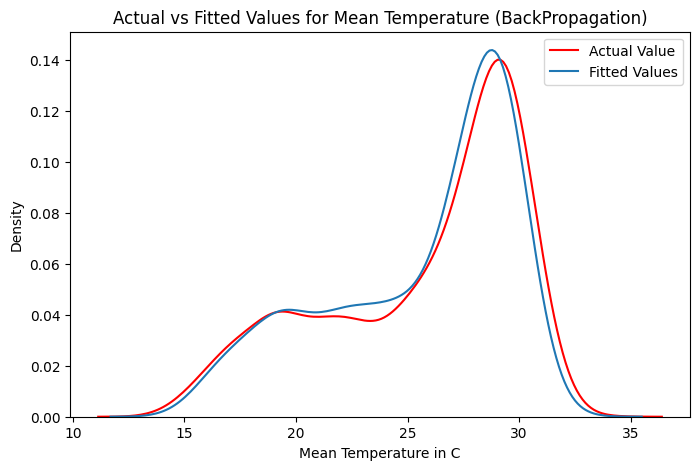

In [ ]:
plt.figure(figsize=(8, 5))

ax1 = sns.kdeplot(df['TempMean'], color="r", label="Actual Value")
sns.kdeplot(predictions, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Mean Temperature (BackPropagation)')
plt.xlabel('Mean Temperature in C')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

In [ ]:
# The original features were: TempMax, TempMin, RelHumMax, RelHumMin, RelHumMean, WindGustMax, WindGustMin, WindMean, PressMax, PressMin, PressMean, SunShDur, SunShDurMin, ShWaveRad, UVRad, Evapotranspiration
# We excluded 'TempMean', 'zone', and 'Date' from the features used for training, which leaves 15 features.
future_features = np.array([[3698, 32.74043, 27.28042, 93.94258, 70.56336, 83.55624, 8.2, 5.2, 6.645834, 4.134006, 2.973214, 3.419515, 433.5394, 3812, 464.1, 3.51648]]) # Example values (15 features)

imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
scaler = StandardScaler()
# Reshape the future_features to be a 2D array with a single sample
future_features = imputer.fit_transform(future_features)
future_features = scaler.fit_transform(future_features)

# Use the trained Decision Tree Regressor model to predict the TempMean for the future date
predicted_tempmean_future = f_model.predict(future_features)

print(f'Predicted TempMean for the future date: {predicted_tempmean_future[0]:.2f} C')

Predicted TempMean for the future date: 25.34 C


# LSTM Long Short-Term Memory

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.LSTM(128, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping and tqdm progress bar
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set the number of epochs
epochs = 100

# Initialize tqdm progress bar
epoch_bar = tqdm(total=epochs, desc='Epochs', unit='epoch', position=0)

# Train the model
for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the test set
    mse = model.evaluate(X_test, y_test, verbose=0)

    # Update the tqdm progress bar
    epoch_bar.set_postfix_str(f'Epoch {epoch + 1}/{epochs} - loss: {history.history["loss"][0]:.4f} - val_loss: {history.history["val_loss"][0]:.4f} - Test MSE: {mse:.4f}')
    epoch_bar.update(1)

# Close the tqdm progress bar
epoch_bar.close()

predictions = model.predict(X_test)

# Store results in a list
results = []
for i in range(10):
    actual_value = y_test[i]
    predicted_value = predictions[i][0]
    results.append([f'Sample {i + 1}', f'{actual_value:.2f}', f'{predicted_value:.2f}'])

# Create a table
table = tabulate(results, headers=['Sample', 'Actual', 'Predicted'], tablefmt='pretty')

# Print the table
print(table)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epochs: 100%|██████████| 100/100 [04:20<00:00,  2.60s/epoch, Epoch 100/100 - loss: 0.3500 - val_loss: 2.0891 - Test MSE: 2.0328]


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
+-----------+--------+-----------+
|  Sample   | Actual | Predicted |
+-----------+--------+-----------+
| Sample 1  | 24.02  |   23.96   |
| Sample 2  | 26.50  |   25.45   |
| Sample 3  | 23.81  |   22.82   |
| Sample 4  | 16.49  |   17.03   |
| Sample 5  | 26.61  |   25.05   |
| Sample 6  | 22.98  |   23.05   |
| Sample 7  | 18.94  |   19.14   |
| Sample 8  | 30.96  |   28.74   |
| Sample 9  | 24.90  |   24.72   |
| Sample 10 | 29.53  |   27.75   |
+-----------+--------+-----------+


In [ ]:
# Evaluate the final MSE on the entire test set
LSTM_mse = model.evaluate(X_test, y_test, verbose=0)
print(f'LSTM Test MSE: {LSTM_mse}')
print('Mean absolute error = ' + str(mean_absolute_error(y_test, predictions)))
print('Mean squared error  = ' + str(mean_squared_error(y_test, predictions)))
print('Root mean square error = ' + str(math.sqrt(mean_squared_error(y_test, predictions))))
print('R2 score            = ' + str(r2_score(y_test, predictions)))
print('Variance score train= ' + str(r2_score(y_train, model.predict(X_train))))
print('Variance score test = ' + str(r2_score(y_test, predictions)))

LSTM Test MSE: 2.0328333377838135
Mean absolute error = 1.2210197835797285
Mean squared error  = 2.032832982332587
Root mean square error = 1.4257745201582845
R2 score            = 0.9007049804686101
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Variance score train= 0.8937029328265201
Variance score test = 0.9007049804686101


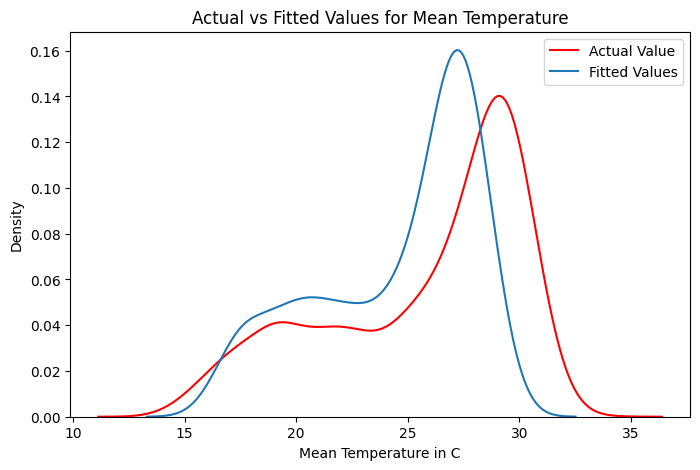

In [ ]:
plt.figure(figsize=(8, 5))

ax1 = sns.kdeplot(df['TempMean'], color="r", label="Actual Value")
sns.kdeplot(predictions, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Mean Temperature')
plt.xlabel('Mean Temperature in C')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

# Random Forest KFold C

In [ ]:
x = df.drop(columns=['TempMean', 'zone']).values  # Convert to NumPy array
y = df['zone'].values  # Convert to NumPy array

# Split the dataset into training and testing sets using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the decision tree model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

# Calculate MSE for the decision tree model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x, y)
y_pred_final  = model.predict(x)

# Store results in a list
tree_results = []
for i in range(10):
    actual_value = y[i]
    predicted_value = y_pred_final[i]
    tree_results.append([f'Sample {i + 1}', f'{actual_value:.2f}', f'{predicted_value:.2f}'])

# Create a table for decision tree results
tree_table = tabulate(tree_results, headers=['Sample', 'Actual', 'Predicted'], tablefmt='pretty')

# Print the decision tree results table
print("Random F classification Kfold Results:")
print(tree_table)

Random F classification Kfold Results:
+-----------+--------+-----------+
|  Sample   | Actual | Predicted |
+-----------+--------+-----------+
| Sample 1  |  1.00  |   1.00    |
| Sample 2  |  1.00  |   1.00    |
| Sample 3  |  1.00  |   1.00    |
| Sample 4  |  1.00  |   1.00    |
| Sample 5  |  1.00  |   1.00    |
| Sample 6  |  1.00  |   1.00    |
| Sample 7  |  1.00  |   1.00    |
| Sample 8  |  1.00  |   1.00    |
| Sample 9  |  1.00  |   1.00    |
| Sample 10 |  1.00  |   1.00    |
+-----------+--------+-----------+


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# AUC calculation for classification models
def auccalc(model, x_test, z_test):
  # Predict probabilities
  z_score = model.predict_proba(x_test)

  # Binarize the test labels for AUC calculation
  z_test_bin = label_binarize(z_test, classes=np.unique(z_test)) # Changed z to z_test

  # Compute AUC using One-vs-Rest
  auc_ovr = roc_auc_score(z_test_bin, z_score, average="macro", multi_class="ovr")

  #print(f"AUC score = {auc_ovr}")
  return(auc_ovr)

# Evaluate the model
print(classification_report(y, y_pred_final))

print('Accuracy  = ' + str(accuracy_score(y, y_pred_final)))
print('Recall    = ' + str(recall_score(y, y_pred_final, average='weighted')))
print('Precision = ' + str(precision_score(y, y_pred_final, average='weighted')))
print('f1_M      = ' + str(f1_score(y, y_pred_final, average='macro' )))
print('f1_m      = ' + str(f1_score(y, y_pred_final, average='micro' ))) # Changed y_pred_finalr to y_pred_final
print('f1_W      = ' + str(f1_score(y, y_pred_final, average='weighted')))
print('CrossVal  = ' + str(np.mean(cross_val_score(model, x_test, y_test, cv=10))))
print(f"AUC score = {auccalc(model, x_test, y_test)}")

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       593
           2       1.00      1.00      1.00       718
           3       1.00      1.00      1.00      1904
           4       1.00      1.00      1.00       482

    accuracy                           1.00      3697
   macro avg       1.00      1.00      1.00      3697
weighted avg       1.00      1.00      1.00      3697

Accuracy  = 1.0
Recall    = 1.0
Precision = 1.0
f1_M      = 1.0
f1_m      = 1.0
f1_W      = 1.0
CrossVal  = 0.9134209552017772
AUC score = 1.0


Confusion Matrix:
[[ 593    0    0    0]
 [   0  718    0    0]
 [   0    0 1904    0]
 [   0    0    0  482]]


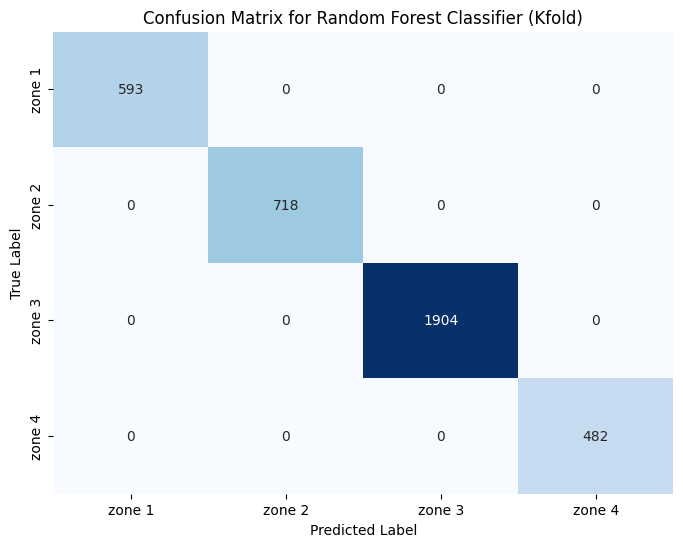

In [ ]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_final)
print("Confusion Matrix:")
print(conf_matrix)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier (Kfold)')
plt.xticks([0.5, 1.5, 2.5, 3.5], ['zone 1', 'zone 2', 'zone 3', 'zone 4'])
plt.yticks([0.5, 1.5, 2.5, 3.5], ['zone 1', 'zone 2', 'zone 3', 'zone 4'])
plt.show()

In [ ]:
# The original features were: TempMax, TempMin, RelHumMax, RelHumMin, RelHumMean, WindGustMax, WindGustMin, WindMean, PressMax, PressMin, PressMean, SunShDur, SunShDurMin, ShWaveRad, UVRad, Evapotranspiration
# We excluded 'TempMean', 'zone', and 'Date' from the features used for training, which leaves 15 features.
future_features = np.array([[3798, 32.74043, 27.28042, 93.94258, 70.56336, 83.55624, 8.2, 5.2, 6.645834, 4.134006, 2.973214, 3.419515, 433.5394, 3812, 464.1, 3.51648]]) # Example values (15 features)

# Use the trained Decision Tree Regressor model to predict the TempMean for the future date
predicted_tempmean_future = model.predict(future_features)

print(f'Predicted TempMean for the future date: zone {predicted_tempmean_future[0]}')

Predicted TempMean for the future date: zone 3


# SVM Regressor kfold

In [ ]:
x = df.drop(columns=['TempMean', 'zone']).values  # Convert to NumPy array
y = df['TempMean'].values  # Convert to NumPy array

# Split the dataset into training and testing sets using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.svm import LinearSVR

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train your model
    model = LinearSVR(random_state=42, max_iter=10000)
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

final_model = LinearSVR(random_state=42, max_iter=10000)
final_model.fit(x, y)
y_pred_final = final_model.predict(x)


# Store results in a list
svm_results = []
for i in range(10):
    actual_value = y[i]
    predicted_value = y_pred_final[i]
    svm_results.append([f'Sample {i + 1}', f'{actual_value:.2f}', f'{predicted_value:.2f}'])

# Create a table for SVM results
svm_table = tabulate(svm_results, headers=['Sample', 'Actual', 'Predicted'], tablefmt='pretty')

# Print the SVM results table
print("SVM Results:")
print(svm_table)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM Results:
+-----------+--------+-----------+
|  Sample   | Actual | Predicted |
+-----------+--------+-----------+
| Sample 1  | 18.16  |   18.41   |
| Sample 2  | 16.62  |   17.15   |
| Sample 3  | 15.81  |   16.72   |
| Sample 4  | 15.83  |   16.81   |
| Sample 5  | 16.07  |   16.47   |
| Sample 6  | 16.10  |   16.11   |
| Sample 7  | 15.02  |   15.64   |
| Sample 8  | 14.96  |   16.01   |
| Sample 9  | 16.03  |   16.51   |
| Sample 10 | 19.08  |   19.60   |
+-----------+--------+-----------+


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Evaluate the final MSE on the entire test set
print('Model Accuracy      = ' + str(final_model.score(x_train, y_train)))
print('Mean absolute error = ' + str(mean_absolute_error(y, y_pred_final)))
print('Mean squared error  = ' + str(mean_squared_error(y, y_pred_final)))
print('Root mean square error = ' + str(math.sqrt(mean_squared_error(y, y_pred_final))))
print('R2 score            = ' + str(r2_score(y, y_pred_final)))
# Calculate R2 score for train and test sets
print('Variance score train= ' + str(r2_score(y_train, final_model.predict(x_train))))
print('Variance score test = ' + str(r2_score(y, y_pred_final)))

Model Accuracy      = 0.9913580077015852
Mean absolute error = 0.33356182547783825
Mean squared error  = 0.17060602766681188
Root mean square error = 0.4130448252512212
R2 score            = 0.9913512033196772
Variance score train= 0.9913580077015852
Variance score test = 0.9913512033196772


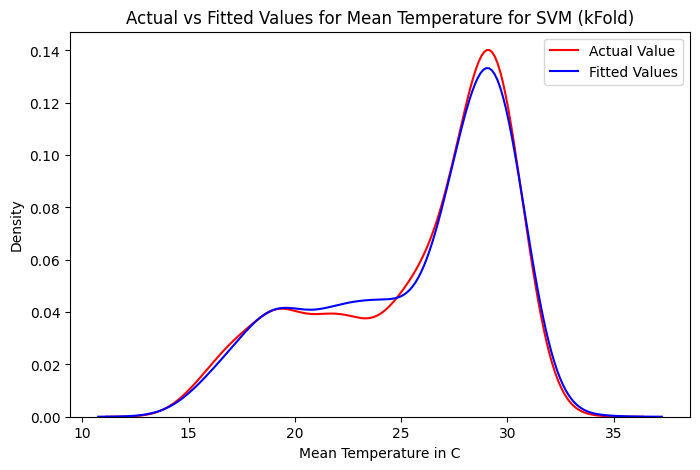

In [ ]:
plt.figure(figsize=(8, 5))

ax1 = sns.kdeplot(df['TempMean'], color="r", label="Actual Value")
bx1 = sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Mean Temperature for SVM (kFold)')
plt.xlabel('Mean Temperature in C')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

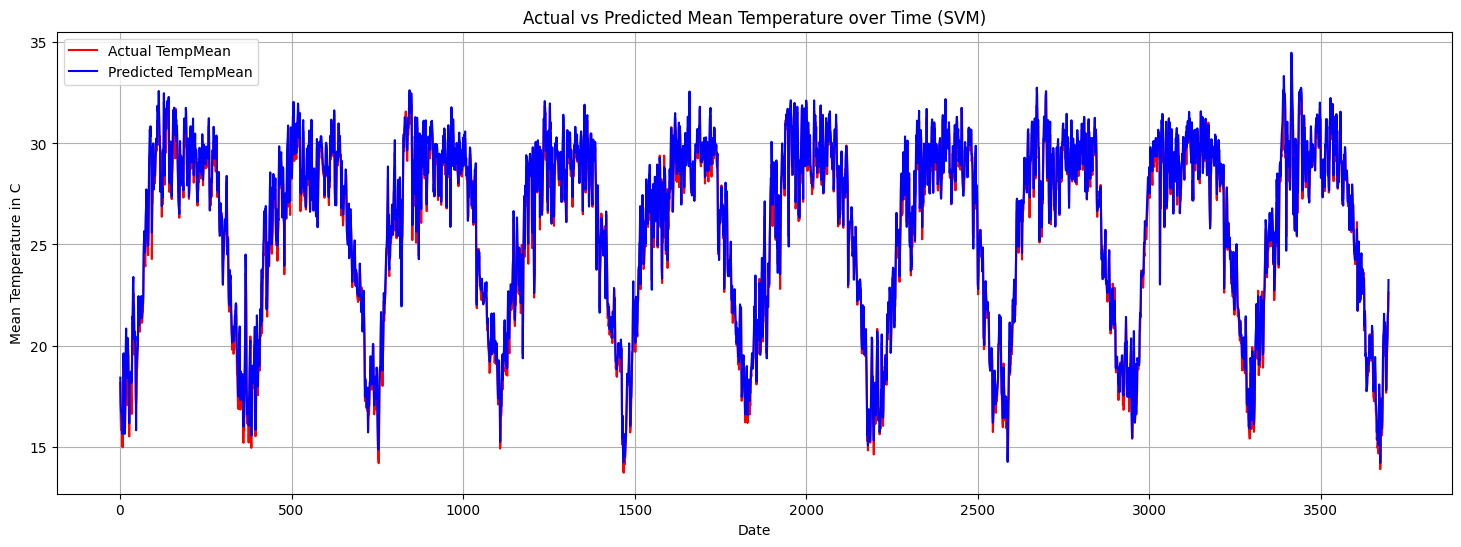

In [ ]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], y, label='Actual TempMean', color='red')
plt.plot(df['Date'], y_pred_final, label='Predicted TempMean', color='blue')
plt.xlabel('Date')
plt.ylabel('Mean Temperature in C')
plt.title('Actual vs Predicted Mean Temperature over Time (SVM)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# The original features were: TempMax, TempMin, RelHumMax, RelHumMin, RelHumMean, WindGustMax, WindGustMin, WindMean, PressMax, PressMin, PressMean, SunShDur, SunShDurMin, ShWaveRad, UVRad, Evapotranspiration
# We excluded 'TempMean', 'zone', and 'Date' from the features used for training, which leaves 15 features.
future_features = np.array([[198, 32.74043, 27.28042, 93.94258, 70.56336, 83.55624, 8.2, 5.2, 6.645834, 4.134006, 2.973214, 3.419515, 433.5394, 3812, 464.1, 3.51648]]) # Example values (15 features)

# Use the trained Decision Tree Regressor model to predict the TempMean for the future date
predicted_tempmean_future = final_model.predict(future_features)

print(f'Predicted TempMean for the future date: {predicted_tempmean_future[0]:.2f} C')

Predicted TempMean for the future date: 29.91 C


# XGBOOST

In [ ]:
# Assuming 'TempAvgF' is the target variable
target_variable = 'TempMean'

X = df.drop(columns=[target_variable, 'zone']).values  # Convert to NumPy array
y = df[target_variable].values  # Convert to NumPy array

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
for train_index, test_index in kf.split(X): # Changed from x to X
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the XGBoost regression model
    xgb_model = XGBRegressor(objective='reg:squarederror')  # 'reg:squarederror' for regression
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test set
    xgb_predictions = xgb_model.predict(X_test)

# Create and train the XGBoost regression model
f_model = XGBRegressor(objective='reg:squarederror')  # 'reg:squarederror' for regression
f_model.fit(X, y)
# Make predictions on the test set
y_pred_final = f_model.predict(X)

# Store results in a list
xgb_results = []
for i in range(10):
    actual_value = y[i]
    predicted_value = y_pred_final[i] # Corrected typo from y_pred_fina to y_pred_final
    xgb_results.append([f'Sample {i + 1}', f'{actual_value:.2f}', f'{predicted_value:.2f}'])

# Create a table for XGBoost results
xgb_table = tabulate(xgb_results, headers=['Sample', 'Actual', 'Predicted'], tablefmt='pretty')

# Print the XGBoost results table
print("XGBoost Results:")
print(xgb_table)

XGBoost Results:
+-----------+--------+-----------+
|  Sample   | Actual | Predicted |
+-----------+--------+-----------+
| Sample 1  | 18.16  |   18.07   |
| Sample 2  | 16.62  |   16.52   |
| Sample 3  | 15.81  |   15.86   |
| Sample 4  | 15.83  |   15.97   |
| Sample 5  | 16.07  |   16.09   |
| Sample 6  | 16.10  |   16.07   |
| Sample 7  | 15.02  |   15.02   |
| Sample 8  | 14.96  |   14.98   |
| Sample 9  | 16.03  |   15.93   |
| Sample 10 | 19.08  |   19.09   |
+-----------+--------+-----------+


In [ ]:
# Evaluate the model # Explained variance score: 1 is perfect prediction
print('Mean absolute error = ' + str(mean_absolute_error(y, y_pred_final)))
print('Mean squared error  = ' + str(mean_squared_error(y, y_pred_final)))
print('Root mean square error = ' + str(math.sqrt(mean_squared_error(y, y_pred_final))))
print('R2 score            = ' + str(r2_score(y, y_pred_final)))
# Calculate R2 score for train and test sets
print('Variance score train= ' + str(r2_score(y, y_pred_final)))
# Removed incorrect line: print('Variance score test = ' + str(r2_score(y_test, y_pred_final)))
# Cross-validation is not directly applicable to Keras models in this way
print("CossVal             = " + str(np.mean(cross_val_score(f_model, X, y, cv=10, scoring='r2')))) # Changed y_test to y

Mean absolute error = 0.052549244451859704
Mean squared error  = 0.005061893279101476
Root mean square error = 0.07114698362616279
R2 score            = 0.9997433895719444
Variance score train= 0.9997433895719444
CossVal             = 0.9927264569742908


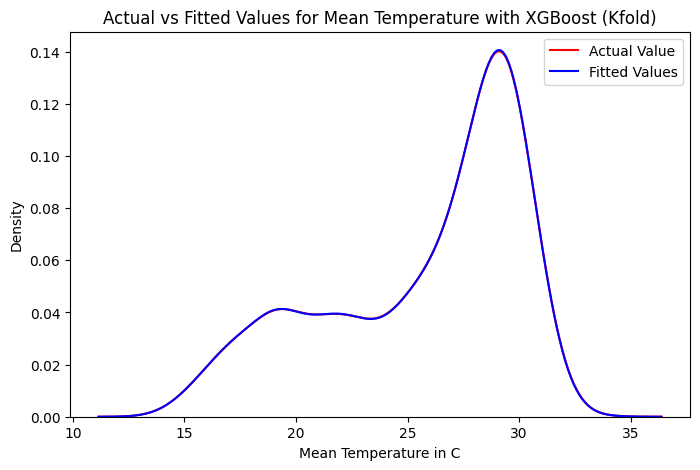

In [ ]:
plt.figure(figsize=(8, 5))

ax1 = sns.kdeplot(df['TempMean'], color="r", label="Actual Value")
sns.kdeplot(y_pred_final, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Mean Temperature with XGBoost (Kfold)')
plt.xlabel('Mean Temperature in C')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

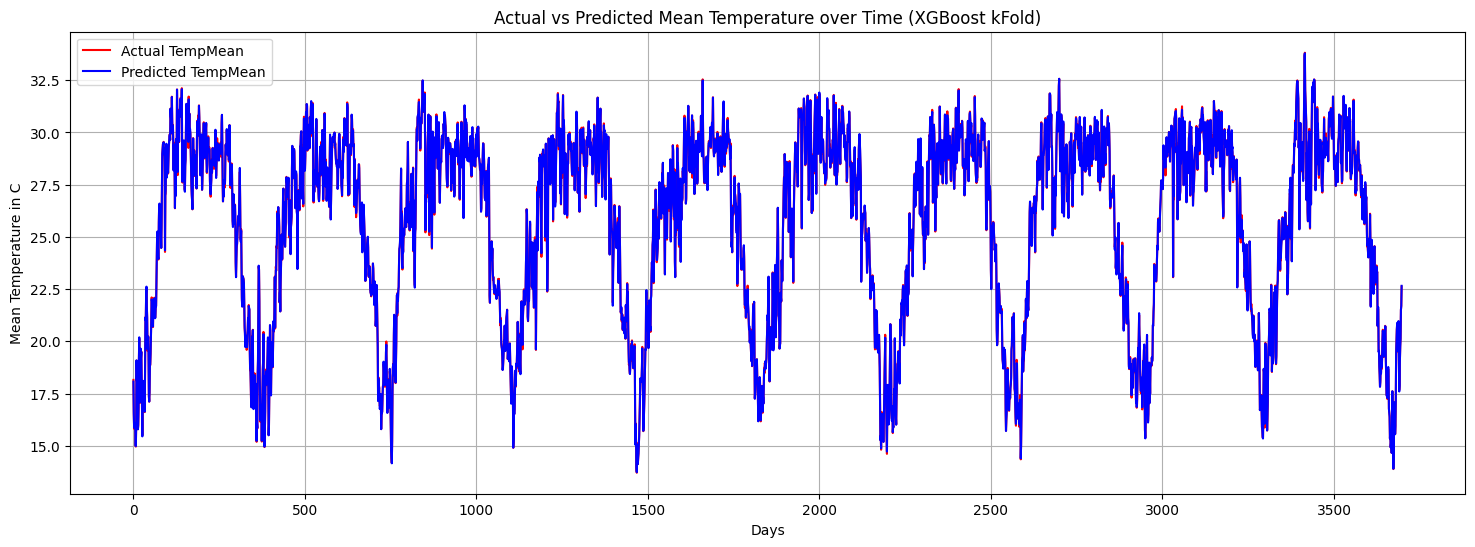

In [ ]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], y, label='Actual TempMean', color='red')
plt.plot(df['Date'], y_pred_final, label='Predicted TempMean', color='blue')
plt.xlabel('Days')
plt.ylabel('Mean Temperature in C')
plt.title('Actual vs Predicted Mean Temperature over Time (XGBoost kFold)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# The original features were: TempMax, TempMin, RelHumMax, RelHumMin, RelHumMean, WindGustMax, WindGustMin, WindMean, PressMax, PressMin, PressMean, SunShDur, SunShDurMin, ShWaveRad, UVRad, Evapotranspiration
# We excluded 'TempMean', 'zone', and 'Date' from the features used for training, which leaves 15 features.
future_features = np.array([[3698, 32.74043, 27.28042, 93.94258, 70.56336, 83.55624, 8.2, 5.2, 6.645834, 4.134006, 2.973214, 3.419515, 433.5394, 3812, 464.1, 3.51648]]) # Example values (15 features)

# Use the trained Decision Tree Regressor model to predict the TempMean for the future date
predicted_tempmean_future = f_model.predict(future_features)

print(f'Predicted TempMean for the future date: {predicted_tempmean_future[0]:.2f} C')

Predicted TempMean for the future date: 31.01 C


# CatBoost

In [ ]:
# Create and train the CatBoost regression model
catboost_model = CatBoostRegressor(iterations=500, depth=10, learning_rate=0.05, loss_function='RMSE')
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=20, verbose=50)

# Make predictions on the test set
catboost_predictions = catboost_model.predict(X_test)

# Calculate MSE for the CatBoost model
catboost_mse = mean_squared_error(y_test, catboost_predictions)

# Store results in a list
catboost_results = []
for i in range(10):
    actual_value = y_test[i]
    predicted_value = catboost_predictions[i]
    catboost_results.append([f'Sample {i + 1}', f'{actual_value:.2f}', f'{predicted_value:.2f}'])

# Create a table for CatBoost results
catboost_table = tabulate(catboost_results, headers=['Sample', 'Actual', 'Predicted'], tablefmt='pretty')

# Print the CatBoost results table
print("CatBoost Results:")
print(catboost_table)


0:	learn: 4.2754896	test: 4.1862888	best: 4.1862888 (0)	total: 163ms	remaining: 1m 21s
50:	learn: 0.6295242	test: 0.6199495	best: 0.6199495 (50)	total: 2.62s	remaining: 23.1s
100:	learn: 0.3458499	test: 0.3962725	best: 0.3962725 (100)	total: 4.69s	remaining: 18.5s
150:	learn: 0.2955883	test: 0.3725676	best: 0.3725676 (150)	total: 6.75s	remaining: 15.6s
200:	learn: 0.2602029	test: 0.3622211	best: 0.3622211 (200)	total: 8.81s	remaining: 13.1s
250:	learn: 0.2276033	test: 0.3568632	best: 0.3568632 (250)	total: 10.9s	remaining: 10.8s
300:	learn: 0.2003093	test: 0.3522389	best: 0.3522389 (300)	total: 14.9s	remaining: 9.84s
350:	learn: 0.1781904	test: 0.3490138	best: 0.3489622 (347)	total: 17.5s	remaining: 7.43s
400:	learn: 0.1595976	test: 0.3471017	best: 0.3471017 (400)	total: 19.6s	remaining: 4.83s
450:	learn: 0.1449388	test: 0.3448174	best: 0.3448174 (450)	total: 21.7s	remaining: 2.35s
499:	learn: 0.1326214	test: 0.3435816	best: 0.3435815 (498)	total: 23.7s	remaining: 0us

bestTest = 0.343

In [ ]:
# Evaluate the model # Explained variance score: 1 is perfect prediction
print('Mean absolute error = ' + str(mean_absolute_error(y_test, catboost_predictions)))
print('Mean squared error  = ' + str(mean_squared_error(y_test, catboost_predictions)))
print('Root mean square error = ' + str(math.sqrt(mean_squared_error(y_test, catboost_predictions))))
print('R2 score            = ' + str(r2_score(y_test, catboost_predictions)))
# Calculate R2 score for train and test sets
print('Variance score train= ' + str(r2_score(y_train, catboost_model.predict(X_train))))
print('Variance score test = ' + str(r2_score(y_test, catboost_predictions)))

Mean absolute error = 0.24660726610414468
Mean squared error  = 0.11804825086834882
Root mean square error = 0.34358150542243804
R2 score            = 0.9938099024296616
Variance score train= 0.9991134051871983
Variance score test = 0.9938099024296616


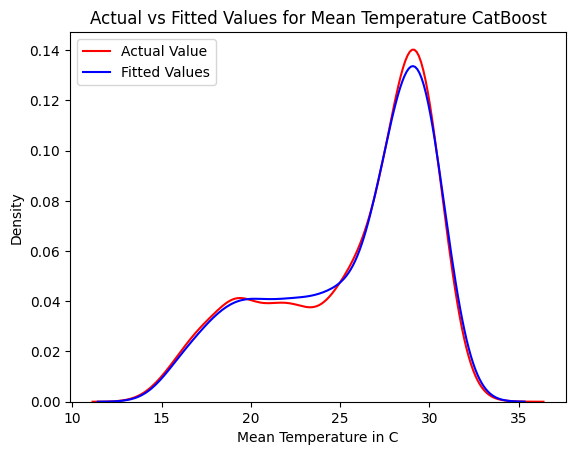

In [ ]:
ax1 = sns.kdeplot(df['TempMean'], color="r", label="Actual Value")
sns.kdeplot(catboost_predictions, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Mean Temperature CatBoost')
plt.xlabel('Mean Temperature in C')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

In [ ]:
# The original features were: TempMax, TempMin, RelHumMax, RelHumMin, RelHumMean, WindGustMax, WindGustMin, WindMean, PressMax, PressMin, PressMean, SunShDur, SunShDurMin, ShWaveRad, UVRad, Evapotranspiration
# We excluded 'TempMean', 'zone', and 'Date' from the features used for training, which leaves 15 features.
future_features = np.array([[198, 32.74043, 27.28042, 93.94258, 70.56336, 83.55624, 8.2, 5.2, 6.645834, 4.134006, 2.973214, 3.419515, 433.5394, 3812, 464.1, 3.51648]]) # Example values (15 features)

# Use the trained Decision Tree Regressor model to predict the TempMean for the future date
predicted_tempmean_future = catboost_model.predict(future_features)

print(f'Predicted TempMean for the future date: {predicted_tempmean_future[0]:.2f} C')

Predicted TempMean for the future date: 28.46 C


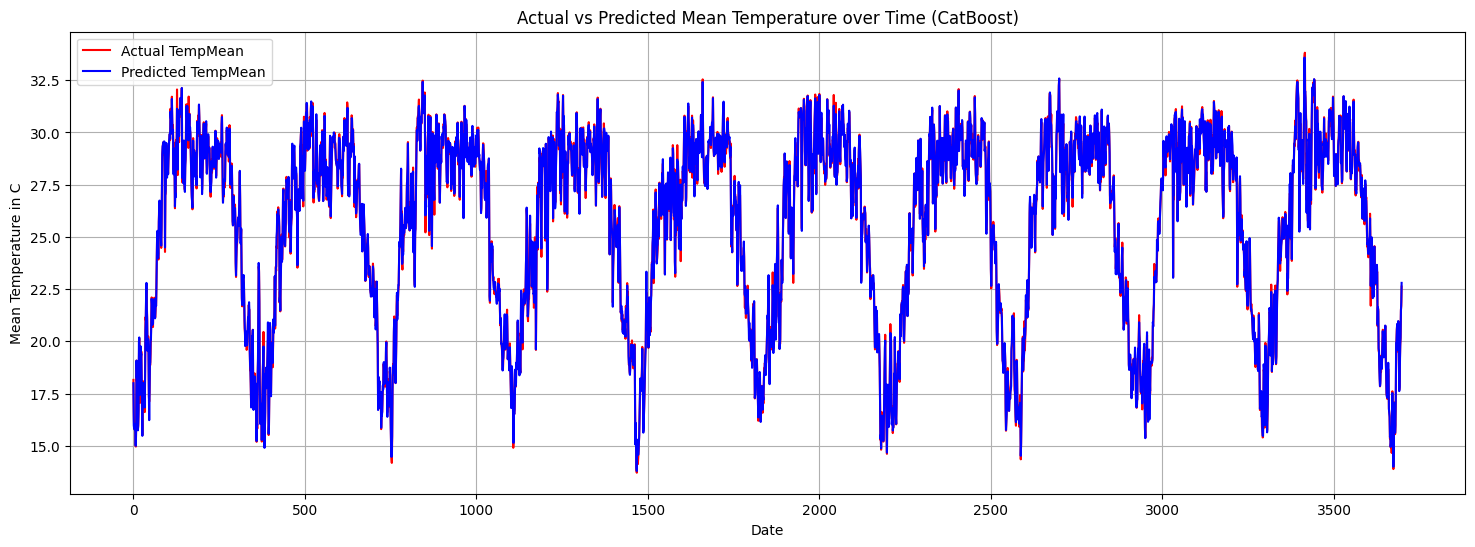

In [ ]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], y, label='Actual TempMean', color='red')
plt.plot(df['Date'], catboost_model.predict(X), label='Predicted TempMean', color='blue')
plt.xlabel('Date')
plt.ylabel('Mean Temperature in C')
plt.title('Actual vs Predicted Mean Temperature over Time (CatBoost)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x = df.drop(columns=['TempMean', 'zone']).values  # Convert to NumPy array
y = df['TempMean'].values  # Convert to NumPy array

# Split the dataset into training and testing sets using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Multiple Linear Regression KFOLD Testing Kfold


In [ ]:
x = df.drop(columns=['TempMean', 'zone']).values  # Convert to NumPy array
y = df['TempMean'].values  # Convert to NumPy array

# Split the dataset into training and testing sets using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train your model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

final_model = LinearRegression()
final_model.fit(x, y)
y_pred_final = final_model.predict(x)

# Store results in a list
linear_results = []
for i in range(10):
    actual_value = y[i]
    predicted_value = y_pred_final[i]
    linear_results.append([f'Sample {i + 1}', f'{actual_value:.2f}', f'{predicted_value:.2f}'])

# Create a table for Linear Regression results
linear_table = tabulate(linear_results, headers=['Sample', 'Actual', 'Predicted'], tablefmt='pretty')

# Print the Linear Regression results table
print("Linear Regression Results:")
print(linear_table)


Linear Regression Results:
+-----------+--------+-----------+
|  Sample   | Actual | Predicted |
+-----------+--------+-----------+
| Sample 1  | 18.16  |   18.10   |
| Sample 2  | 16.62  |   16.75   |
| Sample 3  | 15.81  |   16.29   |
| Sample 4  | 15.83  |   16.44   |
| Sample 5  | 16.07  |   16.30   |
| Sample 6  | 16.10  |   15.89   |
| Sample 7  | 15.02  |   15.23   |
| Sample 8  | 14.96  |   15.57   |
| Sample 9  | 16.03  |   16.13   |
| Sample 10 | 19.08  |   19.22   |
+-----------+--------+-----------+


In [ ]:
# Evaluate the model # Explained variance score: 1 is perfect prediction
print('Mean absolute error = ' + str(mean_absolute_error(y, y_pred_final)))
print('Mean squared error  = ' + str(mean_squared_error(y, y_pred_final)))
print('Root mean square error = ' + str(math.sqrt(mean_squared_error(y, y_pred_final))))
print('R2 score            = ' + str(r2_score(y, y_pred_final)))
# Calculate R2 score for train and test sets
print('Variance score train= ' + str(r2_score(y_pred_final, y)))
print("CossVal             = " + str(np.mean(cross_val_score(final_model, x, y, cv=10, scoring='r2'))))

Mean absolute error = 0.22289988980265416
Mean squared error  = 0.08658390777178032
Root mean square error = 0.294251436312179
R2 score            = 0.9956106673114246
Variance score train= 0.9955913161312056
CossVal             = 0.9955125795852175


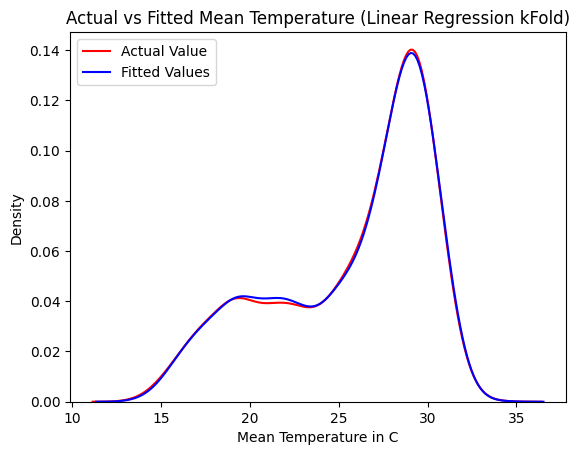

In [ ]:
ax1 = sns.kdeplot(df['TempMean'],  color="r", label="Actual Value")
sns.kdeplot(y_pred_final,  color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Mean Temperature (Linear Regression kFold)')
plt.xlabel('Mean Temperature in C')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

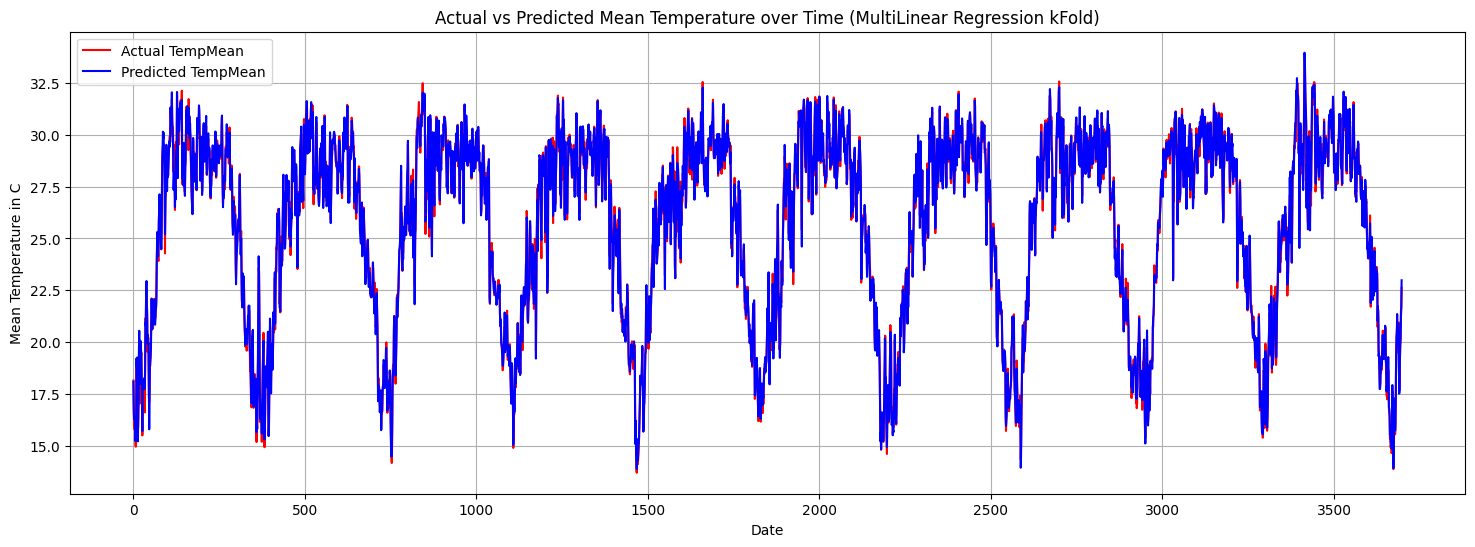

In [ ]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], y, label='Actual TempMean', color='red')
plt.plot(df['Date'], y_pred_final, label='Predicted TempMean', color='blue')
plt.xlabel('Date')
plt.ylabel('Mean Temperature in C')
plt.title('Actual vs Predicted Mean Temperature over Time (MultiLinear Regression kFold)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# The original features were: TempMax, TempMin, RelHumMax, RelHumMin, RelHumMean, WindGustMax, WindGustMin, WindMean, PressMax, PressMin, PressMean, SunShDur, SunShDurMin, ShWaveRad, UVRad, Evapotranspiration
# We excluded 'TempMean', 'zone', and 'Date' from the features used for training, which leaves 15 features.
future_features = np.array([[198, 32.74043, 27.28042, 93.94258, 70.56336, 83.55624, 8.2, 5.2, 6.645834, 4.134006, 2.973214, 3.419515, 433.5394, 3812, 464.1, 3.51648]]) # Example values (15 features)

# Use the trained Decision Tree Regressor model to predict the TempMean for the future date
predicted_tempmean_future = final_model.predict(future_features)

print(f'Predicted TempMean for the future date: {predicted_tempmean_future[0]:.2f} C')

Predicted TempMean for the future date: 29.62 C


# KFOLD random Forest R




In [ ]:
for train_index, test_index in kf.split(x):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Initialize and train your model
  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(x_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(x_test)

final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(x, y)
y_pred_final = final_model.predict(x)

# Store results in a list
rf_results = []
for i in range(10):
    actual_value = y[i]
    predicted_value = y_pred_final[i]
    rf_results.append([f'Sample {i + 1}', f'{actual_value:.2f}', f'{predicted_value:.2f}'])

# Create a table for Linear Regression results
rf_table = tabulate(rf_results, headers=['Sample', 'Actual', 'Predicted'], tablefmt='pretty')

# Print the Linear Regression results table
print("Random Forest Results:")
print(rf_table)

Random Forest Results:
+-----------+--------+-----------+
|  Sample   | Actual | Predicted |
+-----------+--------+-----------+
| Sample 1  | 18.16  |   17.92   |
| Sample 2  | 16.62  |   16.48   |
| Sample 3  | 15.81  |   15.98   |
| Sample 4  | 15.83  |   15.99   |
| Sample 5  | 16.07  |   16.18   |
| Sample 6  | 16.10  |   16.29   |
| Sample 7  | 15.02  |   15.08   |
| Sample 8  | 14.96  |   14.99   |
| Sample 9  | 16.03  |   16.00   |
| Sample 10 | 19.08  |   19.02   |
+-----------+--------+-----------+


In [ ]:
# Evaluate the model on the test set from the KFold split
print('Mean absolute error = ' + str(mean_absolute_error(y, y_pred_final)))
print('Mean squared error  = ' + str(mean_squared_error(y, y_pred_final)))
print('Root mean square error = ' + str(math.sqrt(mean_squared_error(y, y_pred_final))))
print('R2 score            = ' + str(r2_score(y, y_pred_final)))
print('Variance score train= ' + str(model.score(x, y)))
print('Variance score test = ' + str(model.score(x_test, y_test)))
print("CossVal             = " + str(np.mean(cross_val_score(model, x_test, y_test, cv=10, scoring='r2'))))

Mean absolute error = 0.1033940259364347
Mean squared error  = 0.019239832496860843
Root mean square error = 0.13870772327762013
R2 score            = 0.9990246452502031
Variance score train= 0.9978106854031747
Variance score test = 0.992975735316491
CossVal             = 0.9882772397078797


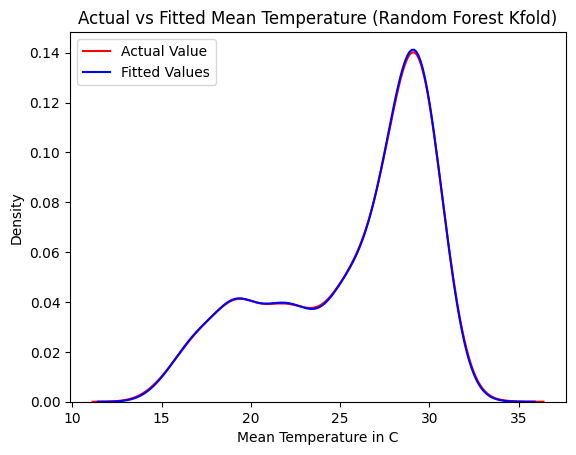

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax1 = sns.kdeplot(df['TempMean'], color="r", label="Actual Value")
sns.kdeplot(y_pred_final, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Mean Temperature (Random Forest Kfold)')
plt.xlabel('Mean Temperature in C')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

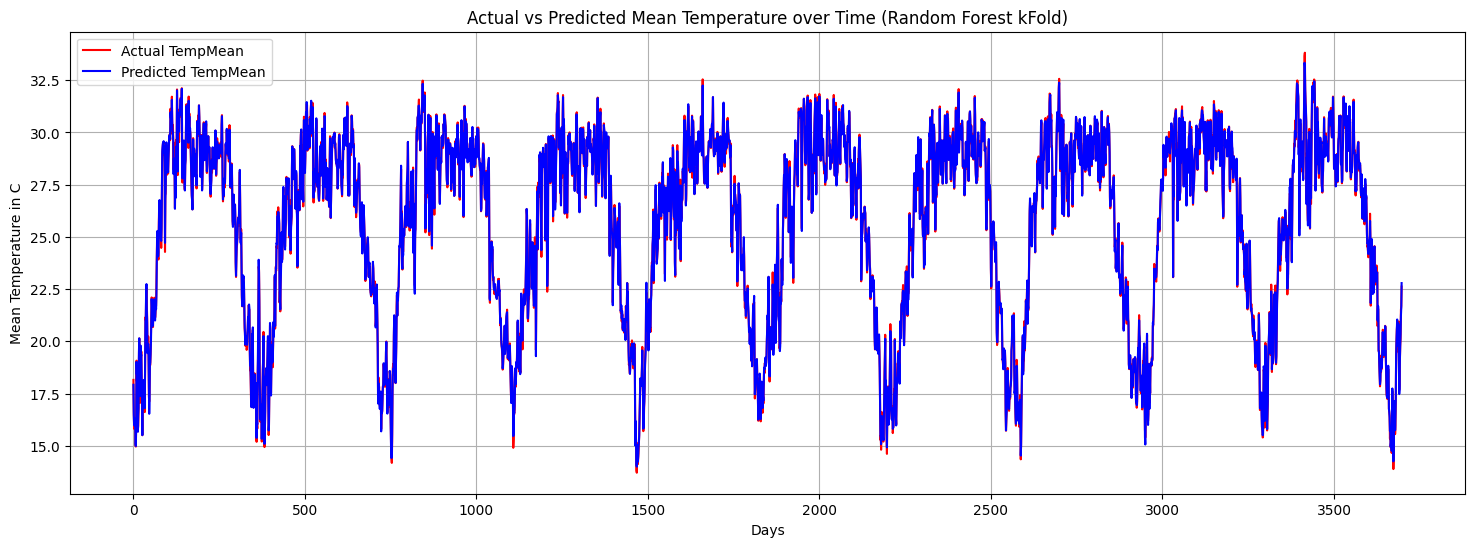

In [ ]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], y, label='Actual TempMean', color='red')
plt.plot(df['Date'], y_pred_final, label='Predicted TempMean', color='blue')
plt.xlabel('Days')
plt.ylabel('Mean Temperature in C')
plt.title('Actual vs Predicted Mean Temperature over Time (Random Forest kFold)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# The original features were: TempMax, TempMin, RelHumMax, RelHumMin, RelHumMean, WindGustMax, WindGustMin, WindMean, PressMax, PressMin, PressMean, SunShDur, SunShDurMin, ShWaveRad, UVRad, Evapotranspiration
# We excluded 'TempMean', 'zone', and 'Date' from the features used for training, which leaves 15 features.
future_features = np.array([[3698, 32.74043, 27.28042, 93.94258, 70.56336, 83.55624, 8.2, 5.2, 6.645834, 4.134006, 2.973214, 3.419515, 433.5394, 3812, 464.1, 3.51648]]) # Example values (15 features)

# Use the trained Decision Tree Regressor model to predict the TempMean for the future date
predicted_tempmean_future = final_model.predict(future_features)

print(f'Predicted TempMean for the future date: {predicted_tempmean_future[0]:.2f} C')

Predicted TempMean for the future date: 29.67 C


# KFold Decision Tree REGRESSOR

In [ ]:
####################
for train_index, test_index in kf.split(x):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Initialize and train your model
  model = DecisionTreeRegressor(random_state=42)
  model.fit(x_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(x_test)

final_model = DecisionTreeRegressor(random_state=42)
final_model.fit(x, y)
y_pred_final = final_model.predict(x)

# Store results in a list
rf_results = []
for i in range(10):
    actual_value = y[i]
    predicted_value = y_pred_final[i]
    rf_results.append([f'Sample {i + 1}', f'{actual_value:.2f}', f'{predicted_value:.2f}'])

# Create a table for Linear Regression results
rf_table = tabulate(rf_results, headers=['Sample', 'Actual', 'Predicted'], tablefmt='pretty')

# Print the Linear Regression results table
print("Decision Tree Results:")
print(rf_table)
#####################


Decision Tree Results:
+-----------+--------+-----------+
|  Sample   | Actual | Predicted |
+-----------+--------+-----------+
| Sample 1  | 18.16  |   18.16   |
| Sample 2  | 16.62  |   16.62   |
| Sample 3  | 15.81  |   15.81   |
| Sample 4  | 15.83  |   15.83   |
| Sample 5  | 16.07  |   16.07   |
| Sample 6  | 16.10  |   16.10   |
| Sample 7  | 15.02  |   15.02   |
| Sample 8  | 14.96  |   14.96   |
| Sample 9  | 16.03  |   16.03   |
| Sample 10 | 19.08  |   19.08   |
+-----------+--------+-----------+


In [ ]:
# Make predictions on the test set from the KFold split
from sklearn.model_selection import cross_val_score

# Evaluate the model on the test set from the KFold split
print('Mean absolute error = ' + str(mean_absolute_error(y, y_pred_final)))
print('Mean squared error  = ' + str(mean_squared_error(y, y_pred_final)))
print('Root mean square error = ' + str(math.sqrt(mean_squared_error(y, y_pred_final))))
print('R2 score            = ' + str(r2_score(y, y_pred_final)))
print('Variance score train= ' + str(final_model.score(x, y)))
print('Variance score test = ' + str(final_model.score(x_test, y_test)))
print("CossVal             = " + str(np.mean(cross_val_score(final_model, x, y, cv=10, scoring='r2'))))

Mean absolute error = 0.0
Mean squared error  = 0.0
Root mean square error = 0.0
R2 score            = 1.0
Variance score train= 1.0
Variance score test = 1.0
CossVal             = 0.9841674600768295


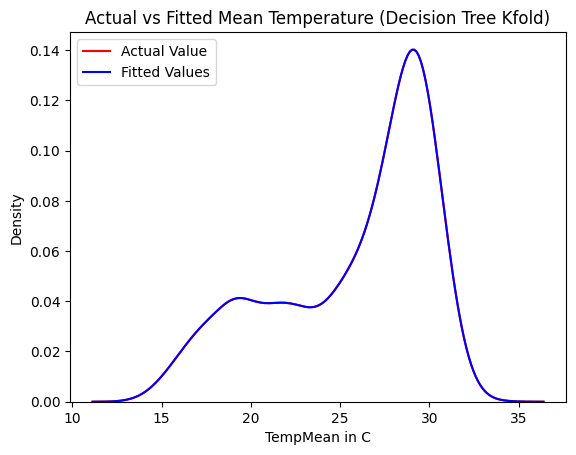

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax1 = sns.kdeplot(df['TempMean'], color="r", label="Actual Value")
sns.kdeplot(y_pred_final, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Mean Temperature (Decision Tree Kfold)')
plt.xlabel('TempMean in C')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

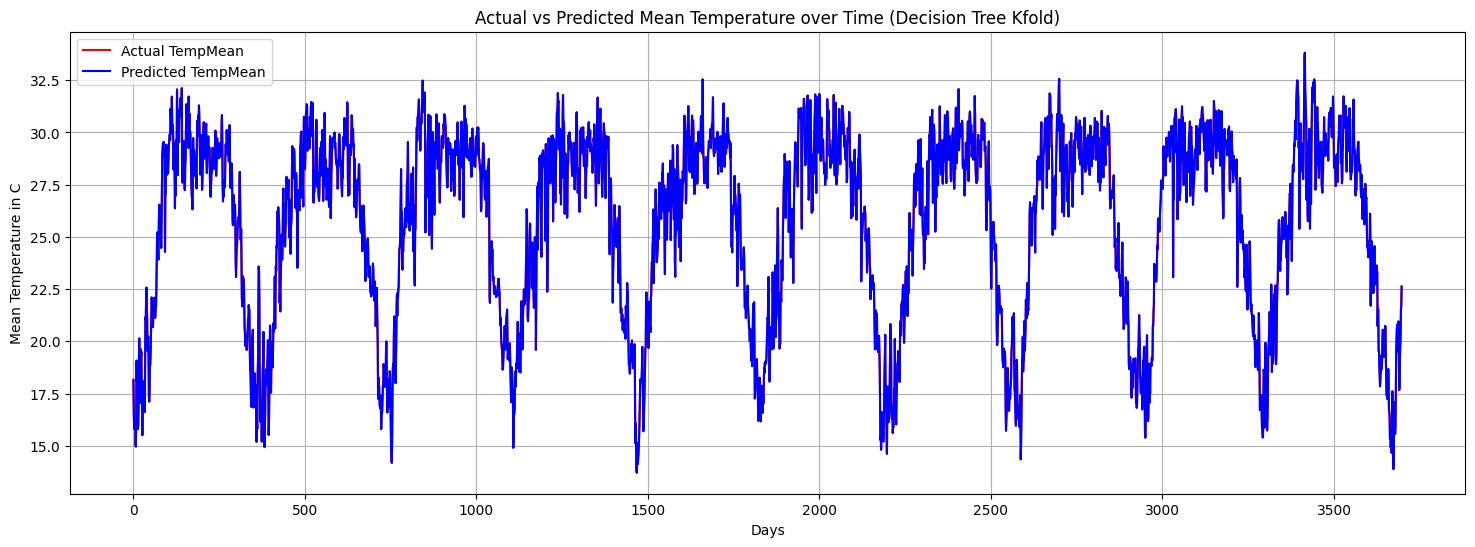

In [ ]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], y, label='Actual TempMean', color='red')
plt.plot(df['Date'], y_pred_final, label='Predicted TempMean', color='blue')
plt.xlabel('Days')
plt.ylabel('Mean Temperature in C')
plt.title('Actual vs Predicted Mean Temperature over Time (Decision Tree Kfold)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# The original features were: TempMax, TempMin, RelHumMax, RelHumMin, RelHumMean, WindGustMax, WindGustMin, WindMean, PressMax, PressMin, PressMean, SunShDur, SunShDurMin, ShWaveRad, UVRad, Evapotranspiration
# We excluded 'TempMean', 'zone', and 'Date' from the features used for training, which leaves 15 features.
future_features = np.array([[3798, 32.74043, 27.28042, 93.94258, 70.56336, 83.55624, 8.2, 5.2, 6.645834, 4.134006, 2.973214, 3.419515, 433.5394, 3812, 464.1, 3.51648]]) # Example values (15 features)

# Use the trained Decision Tree Regressor model to predict the TempMean for the future date
predicted_tempmean_future = final_model.predict(future_features)

print(f'Predicted TempMean for the future date: {predicted_tempmean_future[0]:.2f} C')

Predicted TempMean for the future date: 29.51 C


# KFOLD DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
x = df.drop(columns=['TempMean', 'zone']).values  # Convert to NumPy array
y = df['zone'].values  # Convert to NumPy array

# Split the dataset into training and testing sets using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train your model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

final_model = DecisionTreeClassifier(random_state=42)
final_model.fit(x, y)
y_pred_final = final_model.predict(x)

In [ ]:
actual_predicted_table = pd.DataFrame({ 'Actual_Value': y, 'Predicted_Value': y_pred_final })
print(actual_predicted_table)

      Actual_Value  Predicted_Value
0                1                1
1                1                1
2                1                1
3                1                1
4                1                1
...            ...              ...
3692             1                1
3693             2                2
3694             2                2
3695             2                2
3696             2                2

[3697 rows x 2 columns]


In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model
print(classification_report(y, y_pred_final))


print('Accuracy  = ' + str(accuracy_score(y, y_pred_final)))
print('Recall    = ' + str(recall_score(y, y_pred_final, average='weighted')))
print('Precision = ' + str(precision_score(y, y_pred_final, average='weighted')))
print('f1_M      = ' + str(f1_score(y, y_pred_final, average='macro' )))
print('f1_m      = ' + str(f1_score(y, y_pred_final, average='micro' )))
print('f1_W      = ' + str(f1_score(y, y_pred_final, average='weighted')))
print('CrossVal  = ' + str(np.mean(cross_val_score(final_model, x_test, y_test, cv=10))))
print(f"AUC score = {auccalc(final_model, x_test, y_test)}")

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       593
           2       1.00      1.00      1.00       718
           3       1.00      1.00      1.00      1904
           4       1.00      1.00      1.00       482

    accuracy                           1.00      3697
   macro avg       1.00      1.00      1.00      3697
weighted avg       1.00      1.00      1.00      3697

Accuracy  = 1.0
Recall    = 1.0
Precision = 1.0
f1_M      = 1.0
f1_m      = 1.0
f1_W      = 1.0
CrossVal  = 0.8837097371343947
AUC score = 1.0


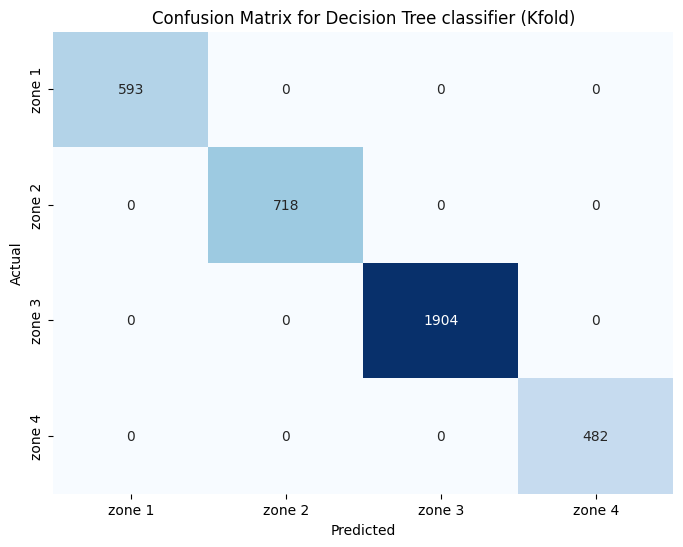

In [ ]:
# prompt: create confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y, y_pred_final)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree classifier (Kfold)')
plt.xticks([0.5, 1.5, 2.5, 3.5], ['zone 1', 'zone 2', 'zone 3', 'zone 4'])
plt.yticks([0.5, 1.5, 2.5, 3.5], ['zone 1', 'zone 2', 'zone 3', 'zone 4'])
plt.show()
plt.close()


In [ ]:
# The original features were: TempMax, TempMin, RelHumMax, RelHumMin, RelHumMean, WindGustMax, WindGustMin, WindMean, PressMax, PressMin, PressMean, SunShDur, SunShDurMin, ShWaveRad, UVRad, Evapotranspiration
# We excluded 'TempMean', 'zone', and 'Date' from the features used for training, which leaves 15 features.
future_features = np.array([[3798, 32.74043, 27.28042, 93.94258, 70.56336, 83.55624, 8.2, 5.2, 6.645834, 4.134006, 2.973214, 3.419515, 433.5394, 3812, 464.1, 3.51648]]) # Example values (15 features)

# Use the trained Decision Tree Regressor model to predict the TempMean for the future date
predicted_tempmean_future = final_model.predict(future_features)

print(f'Predicted TempMean for the future date: zone {predicted_tempmean_future[0]}')

Predicted TempMean for the future date: zone 3


# Compare

''' - XGBoost & CatBoost: These gradient boosting frameworks support k-fold cross-validation natively. You can use tools like xgb.cv or catboost.cv to perform it efficiently.
- MLP (Multi-Layer Perceptron) & Backpropagation-based models: These are typically trained using frameworks like TensorFlow or PyTorch. You can manually implement k-fold by splitting your data using KFold from scikit-learn and training a new model on each fold.
- LSTM (Long Short-Term Memory): Since LSTMs are used for sequential data, k-fold can still be applied, but you need to be cautious. For time series tasks, TimeSeriesSplit is often more appropriate than standard k-fold to preserve temporal order.

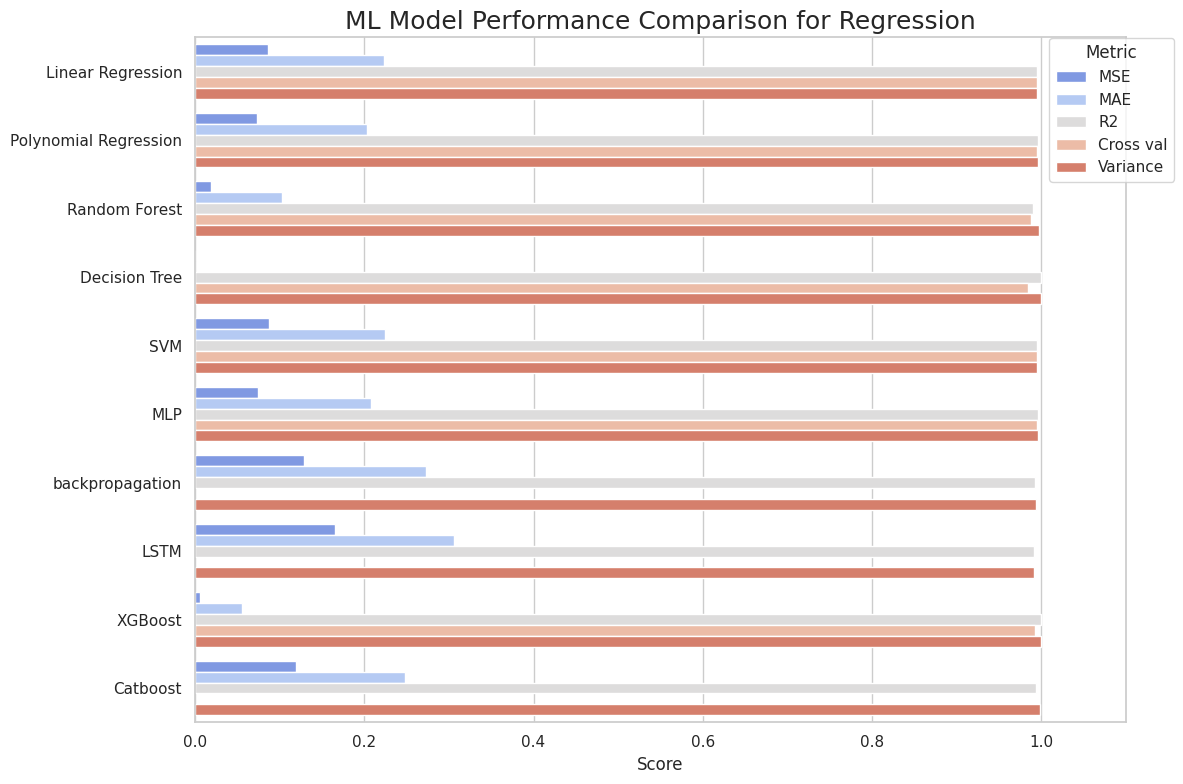

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the performance metrics data for Dementia Group

data = {"Model": ["Linear Regression", "Polynomial Regression", "Random Forest", "Decision Tree",
                 "SVM", "MLP", "backpropagation", "LSTM", "XGBoost", "Catboost"],

         "MSE": [0.08659, 0.072603, 0.01921, 0.0, 0.087752, 0.074095, 0.128107, 0.165352, 0.005661, 0.119382],
        #"RMSE": [0.29426, 0.269449, 0.138595, 0.0, 0.296230, 0.272205, 0.357920, 0.406635, 0.075246, 0.345516],
        "MAE": [0.22285, 0.203275, 0.10319, 0.0, 0.224644, 0.208275, 0.273289, 0.305833, 0.055705, 0.248511],
        "R2": [0.995610, 0.996454, 0.990262, 1.0, 0.995714, 0.996243, 0.993282, 0.991329, 0.999712, 0.993739],
        "Cross val": [0.995522, 0.995269, 0.988505, 0.984276, 0.995573, 0.994829, np.nan, np.nan, 0.992694, np.nan],
        "Variance": [0.995591, 0.996591, 0.997821, 1.0, 0.995538, 0.996276, 0.994048, 0.992271, 0.999712, 0.999040]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Model", inplace=True)

    # Reorder columns if needed
df_reordered = df[["MSE", "MAE", "R2", "Cross val", "Variance"]]

# Melt DataFrame for seaborn plotting
df_melted = df_reordered.reset_index().melt(id_vars="Model", var_name="Metric", value_name="Score")

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x="Score", y="Model", hue="Metric", palette="coolwarm" )

# Customize appearance
plt.title("ML Model Performance Comparison for Regression", fontsize=18)
plt.xlabel("Score")
plt.ylabel("")
plt.xlim(0, 1.1)
plt.legend(title="Metric", bbox_to_anchor=(0.91, 1.01), loc='upper left')
plt.tight_layout()
plt.show()


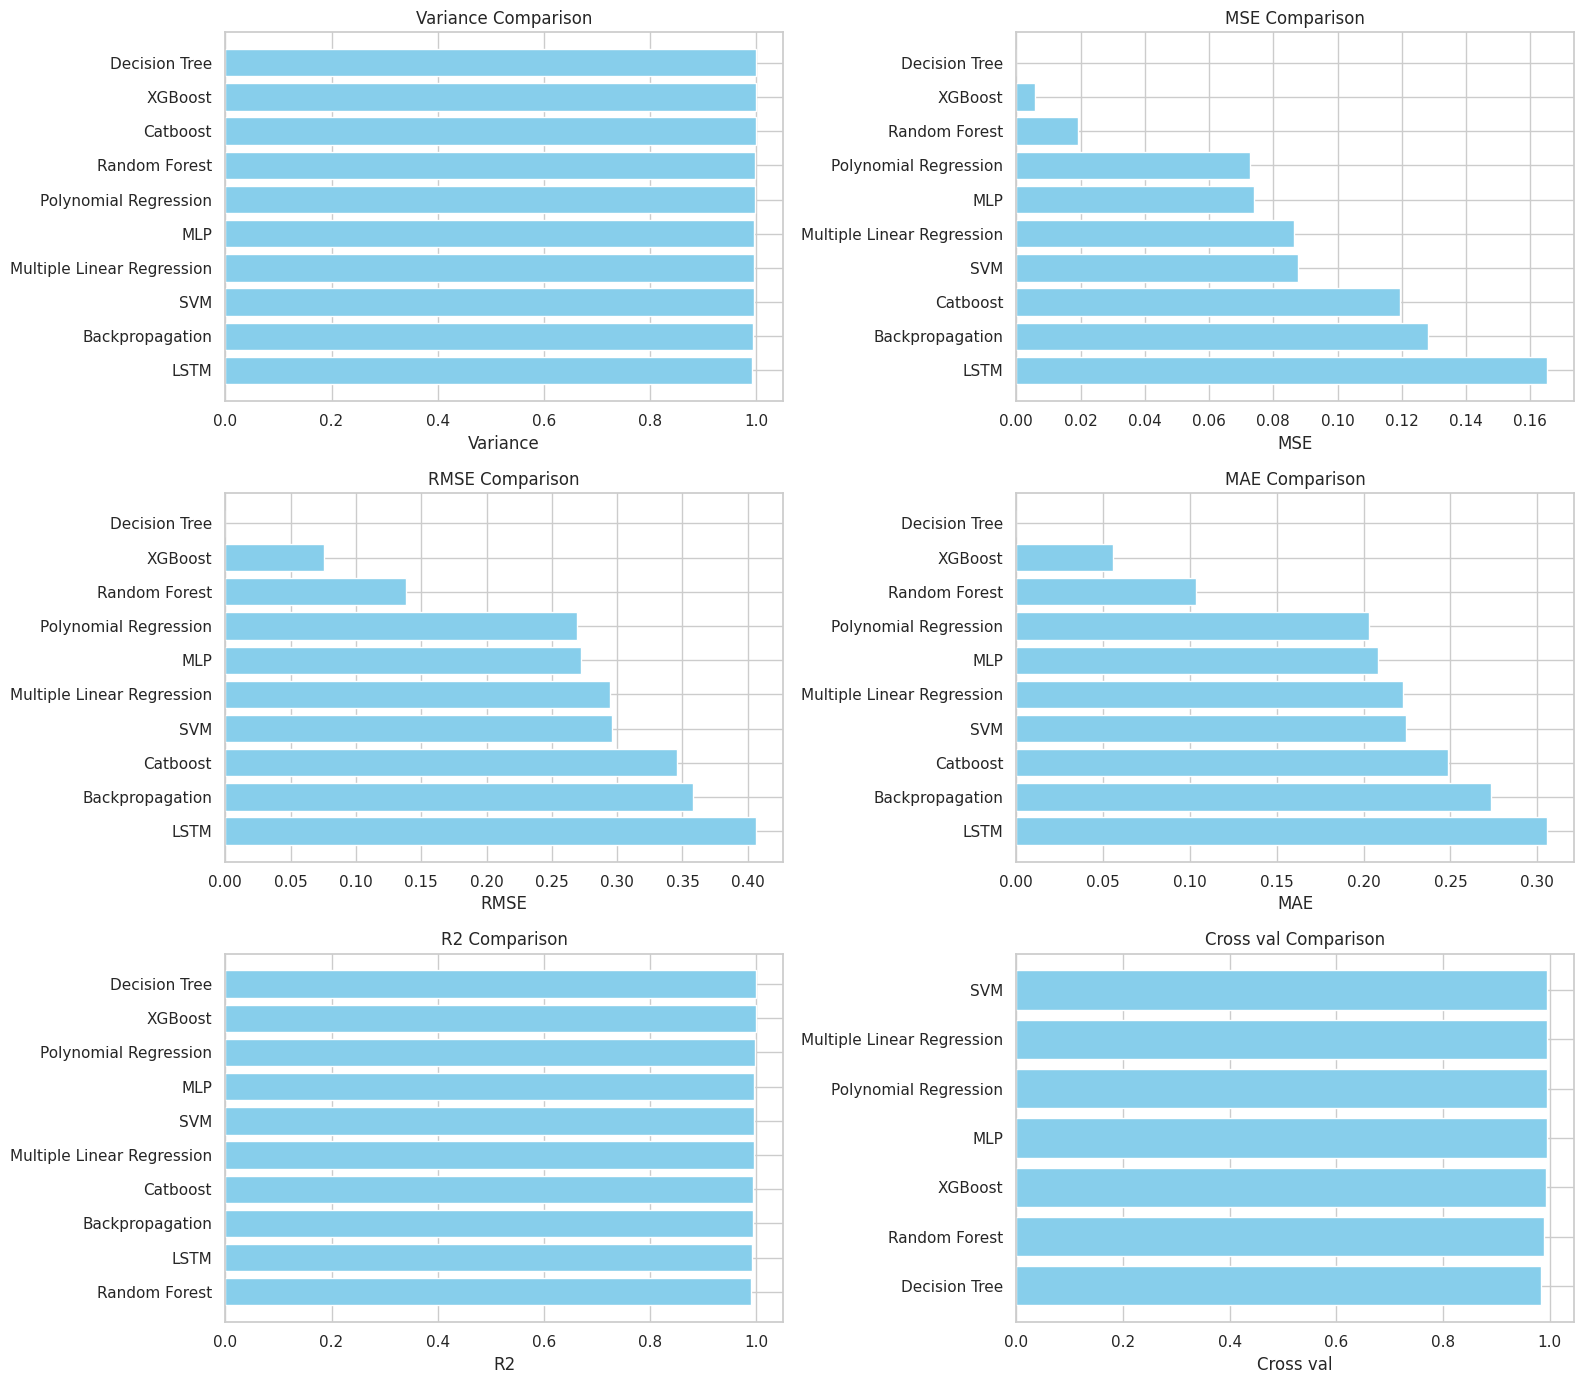

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    "Model": [
        "Multiple Linear Regression", "Polynomial Regression", "Random Forest", "Decision Tree",
        "SVM", "MLP", "Backpropagation", "LSTM", "XGBoost", "Catboost"
    ],
    "Variance": [0.995591, 0.996591, 0.997821, 1.0, 0.995538, 0.996276, 0.994048, 0.992271, 0.999712, 0.999040],

    "MSE": [0.08659, 0.072603, 0.01921, 0.0, 0.087752, 0.074095, 0.128107, 0.165352, 0.005661, 0.119382],
    "RMSE": [0.29426, 0.269449, 0.138595, 0.0, 0.296230, 0.272205, 0.357920, 0.406635, 0.075246, 0.345516],
    "MAE": [0.22285, 0.203275, 0.10319, 0.0, 0.224644, 0.208275, 0.273289, 0.305833, 0.055705, 0.248511],
    "R2": [0.995610, 0.996454, 0.990262, 1.0, 0.995714, 0.996243, 0.993282, 0.991329, 0.999712, 0.993739],
    "Cross val": [0.995522, 0.995269, 0.988505, 0.984276, 0.995573, 0.994829, None, None, 0.992694, None]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
metrics = ["Variance", "MSE", "RMSE", "MAE", "R2", "Cross val"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 14))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    df_sorted = df.sort_values(by=metric, ascending=(metric in ["MSE", "RMSE", "MAE"]))
    axes[i].barh(df_sorted["Model"], df_sorted[metric], color='skyblue')
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_xlabel(metric)
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()

